# Machine Learning Project- Simran Choudhary

In [2]:
# Importing the required libraries

import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras import optimizers

# Reading the dataset

(60000, 28, 28, 1)


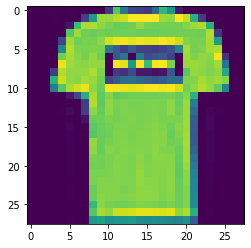

In [3]:
mnist_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data() # Separating the training and testing images and labels

plt.imshow(train_images[1]) # plot for one image using matplotlib

train_images, test_images = train_images/255, test_images/255 # Normlaizing the training and testing images
train_images, test_images = train_images.reshape(len(train_images), 28,28,1), test_images.reshape(len(test_images), 28,28,1) # Reshaping the images 
print(train_images.shape)

In [5]:
# Splitting the dataset into training and testing.
x_train,x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.3, random_state=10) 
# Splitting the images and putting random state to re-produce the results.

# Convolutional Neural Network

In [6]:
# Creating the sequential model for training
model= Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

C:\Users\visha\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
42/42 [==============================] - 9s 100ms/step - loss: 0.6163 - accuracy: 0.7856 - val_loss: 2.0705 - val_accuracy: 0.3054
Epoch 2/50
42/42 [==============================] - 4s 95ms/step - loss: 0.3210 - accuracy: 0.8841 - val_loss: 2.2876 - val_accuracy: 0.1331
Epoch 3/50
42/42 [==============================] - 4s 95ms/step - loss: 0.2620 - accuracy: 0.9045 - val_loss: 2.6956 - val_accuracy: 0.1163
Epoch 4/50
42/42 [==============================] - 4s 95ms/step - loss: 0.2283 - accuracy: 0.9158 - val_loss: 3.1391 - val_accuracy: 0.1043
Epoch 5/50
42/42 [==============================] - 4s 96ms/step - loss: 0.1932 - accuracy: 0.9290 - val_loss: 3.3967 - val_accuracy: 0.1048
Epoch 6/50
42/42 [==============================] - 4s 97ms/step - loss: 0.1731 - accuracy: 0.9372 - val_loss: 3.3807 - val_accuracy: 0.1433
Epoch 7/50
42/42 [==============================] - 4s 98ms/step - loss: 0.1407 - accuracy: 0.9503 - val_loss: 3.4231 - val_accuracy: 0.1503
Epoch 8/50
4

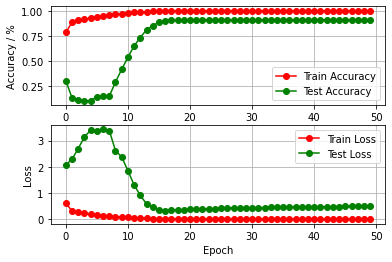

In [7]:
keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False) 
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history= model.fit(x_train, y_train, epochs=50, batch_size=1000, verbose=1, validation_data=(x_test, y_test))

fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['accuracy'], 'ro-', label = "Train Accuracy")
ax[0].plot(history.history['val_accuracy'], 'go-', label = "Test Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy / %")
ax[0].legend(loc = "best")
ax[0].grid('on')

ax[1].plot(history.history['loss'], 'ro-', label = "Train Loss")
ax[1].plot(history.history['val_loss'], 'go-', label = "Test Loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend(loc = "best")
ax[1].grid('on')
plt.show()


# Model  predictions and accuracy

In [8]:
pred=model.predict(x_test)

predictions= np.argmax(pred, axis=1)

accuracy = accuracy_score(predictions, y_test)
print(accuracy)


0.9115555555555556


In [9]:
# Model Evaluation
model.evaluate(test_images,test_labels, batch_size=100) # Testing on the unseen test images

100/100 [==============================] - 1s 5ms/step - loss: 0.5366 - accuracy: 0.9084


[0.5365865230560303, 0.9083999991416931]

In [10]:
# Classification report with F1 Scores
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.85      0.86      1720\n           1       0.99      0.98      0.98      1792\n           2       0.86      0.88      0.87      1843\n           3       0.90      0.93      0.91      1735\n           4       0.86      0.87      0.86      1795\n           5       0.97      0.97      0.97      1862\n           6       0.77      0.74      0.75      1795\n           7       0.95      0.96      0.96      1794\n           8       0.98      0.97      0.98      1803\n           9       0.97      0.96      0.96      1861\n\n    accuracy                           0.91     18000\n   macro avg       0.91      0.91      0.91     18000\nweighted avg       0.91      0.91      0.91     18000\n'

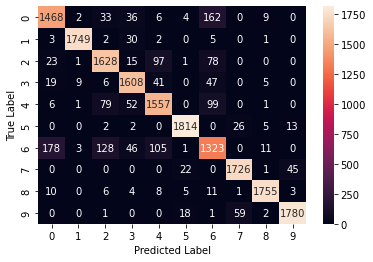

In [11]:
# Confusion matrix to show how the model performed on the test data.
plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions, labels =np.unique(train_labels)),annot=True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()